In [1]:
import spatialdata as sd
import matplotlib.pyplot as plt
import spatialdata_plot

data_dir = "/QRISdata/Q1851/Andrew_C/Other_Project/QIMR_Workshop/data/skin_data/"

In [5]:
sdata = sd.read_zarr(f"{data_dir}/Xenium.zarr")

/home/uqlhocke/micromamba/envs/stlearn/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [9]:
sdata

SpatialData object with:
├── Images
│     ├── 'HE': SpatialImage[cyx] (3, 4633, 14747)
│     ├── 'morphology_focus': MultiscaleSpatialImage[cyx] (1, 37441, 11479), (1, 18720, 5739), (1, 9360, 2869), (1, 4680, 1434), (1, 2340, 717)
│     └── 'morphology_mip': MultiscaleSpatialImage[cyx] (1, 37441, 11479), (1, 18720, 5739), (1, 9360, 2869), (1, 4680, 1434), (1, 2340, 717)
├── Labels
│     ├── 'cell_labels': MultiscaleSpatialImage[yx] (37441, 11479), (18720, 5739), (9360, 2869), (4680, 1434), (2340, 717)
│     └── 'nucleus_labels': MultiscaleSpatialImage[yx] (37441, 11479), (18720, 5739), (9360, 2869), (4680, 1434), (2340, 717)
├── Points
│     └── 'transcripts': DataFrame with shape: (4062390, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (21596, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (21596, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (21596, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (21596, 260)
with 

In [3]:
import ucdeconvolve as ucd
import scanpy as sc

ucd.api.authenticate("uc_B71UGPlwxWaLqfLBl39hq8qutf57bccSDqfyorYlC9uwboSe")

2024-05-28 16:15:35,809|[UCD]|INFO: Updated valid user access token.


/home/uqlhocke/micromamba/envs/stlearn/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
2024-05-28 16:16:51,318|[UCD]|INFO: Starting UCDeconvolveBASE Run. | Timer Started.
Preprocessing Dataset |   0% (0 of 84) | | Elapsed Time: 0:00:00 ETA:  --:--:--
Preprocessing Dataset |   1% (1 of 84) | | Elapsed Time: 0:00:00 ETA:   0:00:08
Preprocessing Dataset |   2% (2 of 84) | | Elapsed Time: 0:00:00 ETA:   0:00:08
Preprocessing Dataset |   3% (3 of 84) | | Elapsed Time: 0:00:00 ETA:   0:00:08
Preprocessing Dataset |   4% (4 of 84) | | Elapsed Time: 0:00:00 ETA:   0:00:08
Preprocessing Dataset |   5% (5 of 84) | | Elapsed Time: 0:00:00 ETA:   0:00:08
Preprocessing Dataset |  

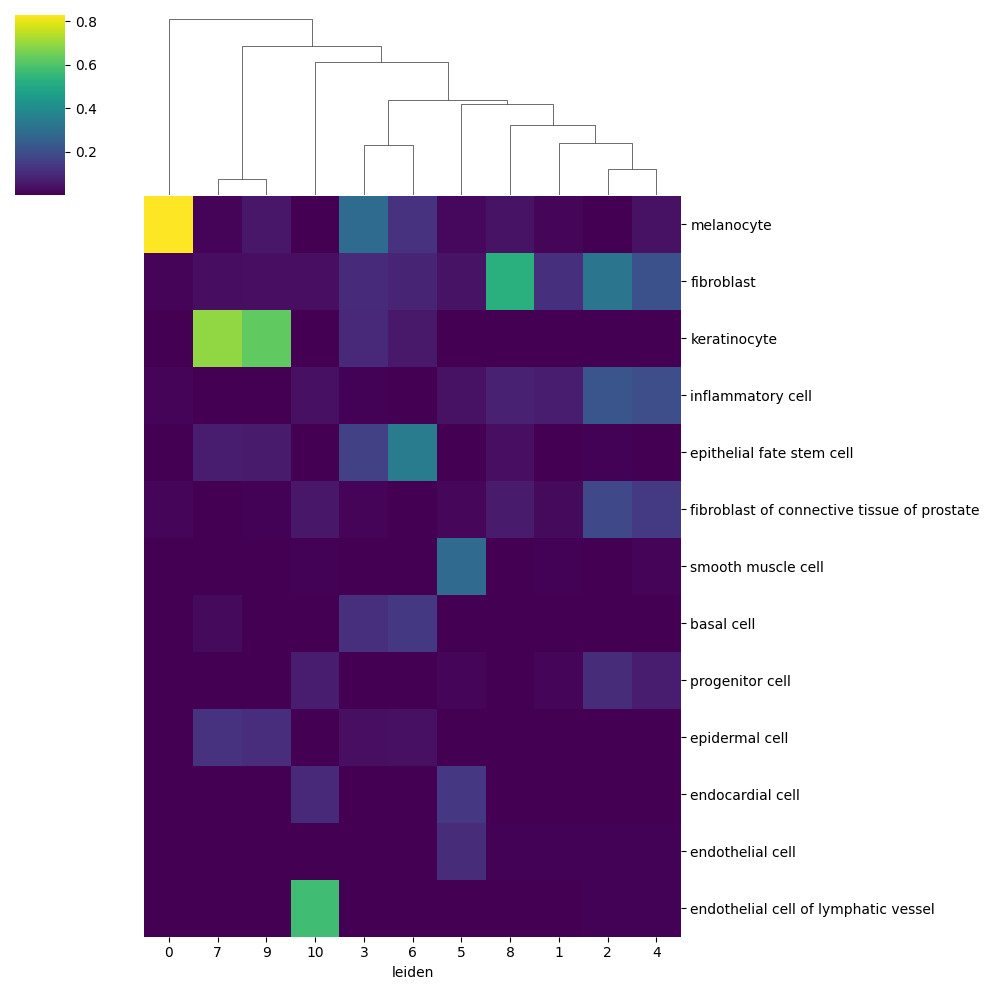

In [6]:
sc.pp.filter_genes(sdata.tables["table"], min_cells=3)
sc.pp.filter_cells(sdata.tables["table"], min_genes=10)
sdata.tables["table"].layers["counts"] = sdata.tables["table"].X.copy()
sc.pp.normalize_total(sdata.tables["table"])
sc.pp.log1p(sdata.tables["table"])
sc.pp.highly_variable_genes(sdata.tables["table"], n_top_genes=2000)
sc.tl.pca(sdata.tables["table"])
sc.pp.neighbors(sdata.tables["table"])
sc.tl.umap(sdata.tables["table"])
sc.tl.leiden(sdata.tables["table"], resolution=0.5)
ucd.tl.base(sdata.tables["table"])
ucd.pl.base_clustermap(sdata.tables["table"], groupby = 'leiden', category = 'raw', n_top_celltypes = 75)
ucd.utils.assign_top_celltypes(sdata.tables["table"], category = "raw", groupby = "leiden")

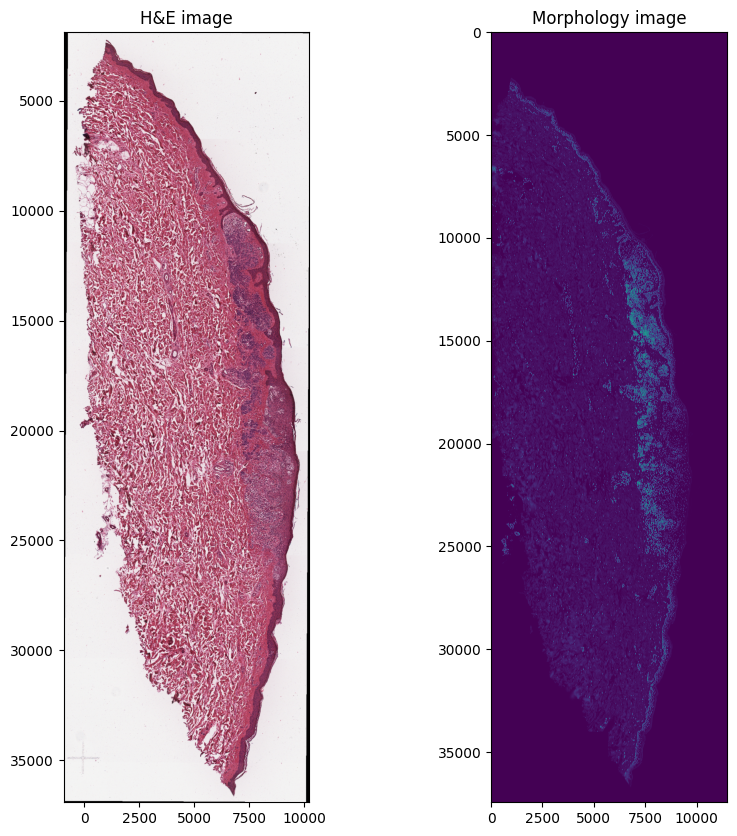

In [7]:
axes = plt.subplots(1, 2, figsize=(10, 10))[1].flatten()
sdata.pl.render_images("HE").pl.show(ax=axes[0], title="H&E image")
sdata.pl.render_images("morphology_focus").pl.show(ax=axes[1], title="Morphology image")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.072649576..1.0].
/home/uqlhocke/micromamba/envs/stlearn/lib/python3.10/site-packages/spatialdata_plot/pl/basic.py:813: UserWarning: Converting copy of 'pred_celltype_ucdbase' column to categorical dtype for categorical plotting. Consider converting before plotting.
  _render_shapes(
/home/uqlhocke/micromamba/envs/stlearn/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:692: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


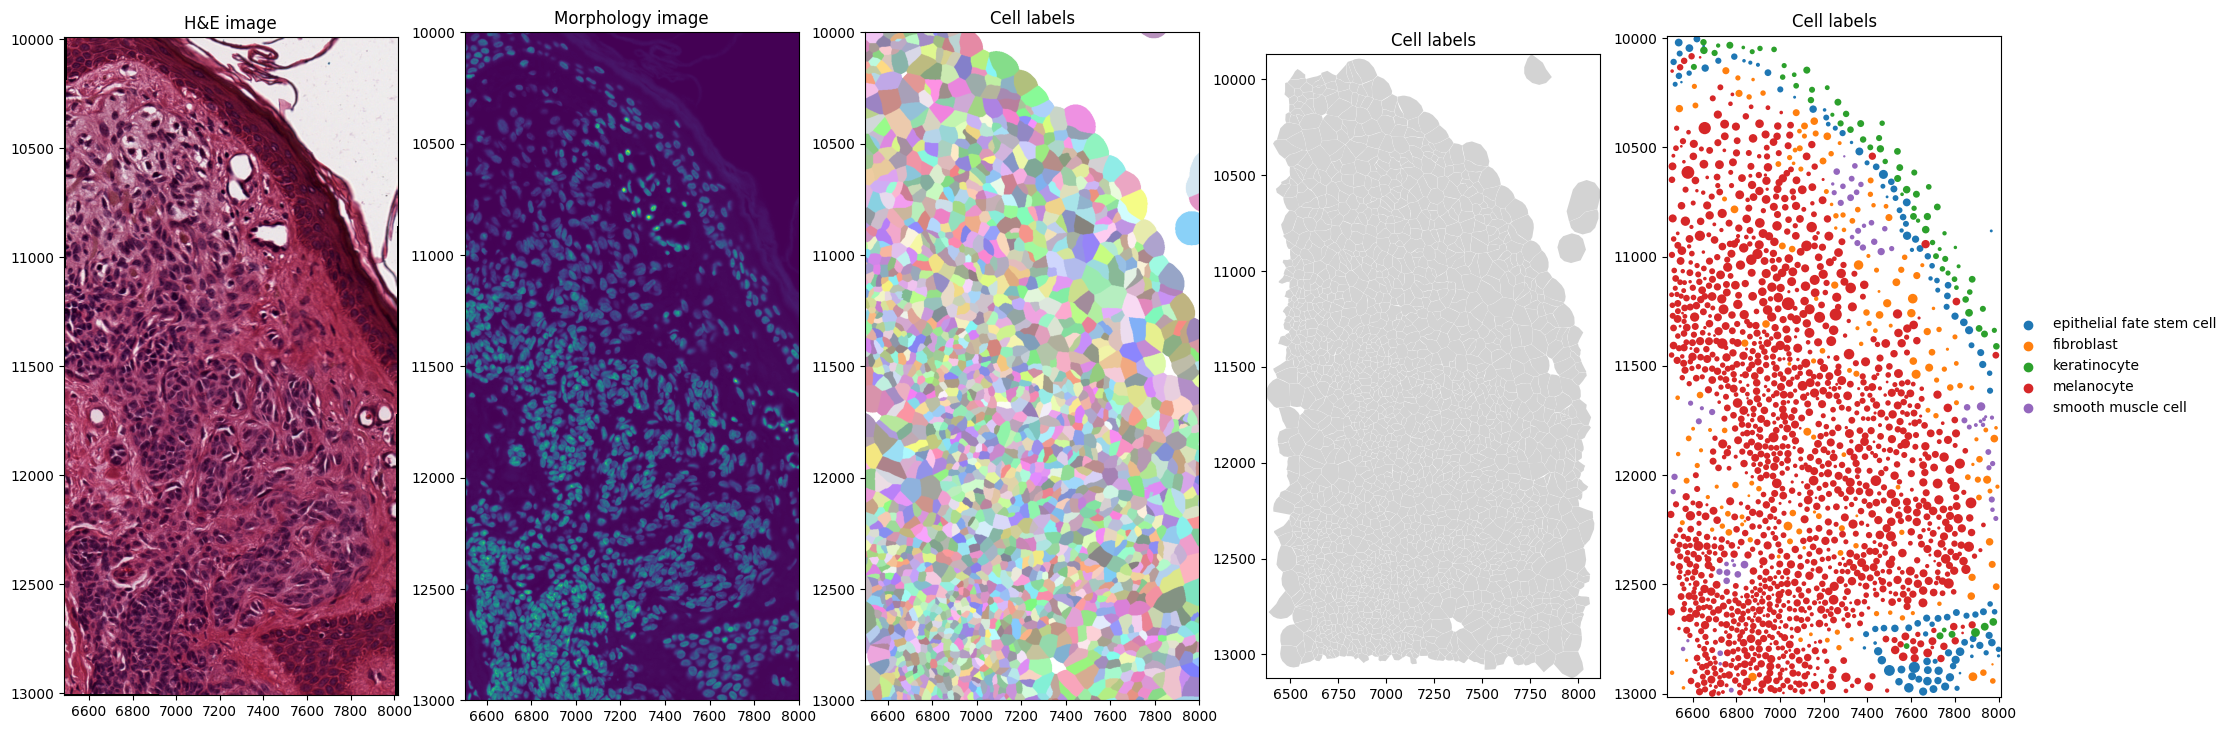

In [9]:
from spatialdata import bounding_box_query

axes = plt.subplots(1, 5, figsize=(25, 20))[1].flatten()
crop0 = lambda x: bounding_box_query(
    x,
    min_coordinate=[6500, 10000],
    max_coordinate=[8000, 13000],
    axes=("x", "y"),
    target_coordinate_system="global",
)
crop0(sdata).pl.render_images("HE").pl.show(ax=axes[0], title="H&E image", coordinate_systems="global")
crop0(sdata).pl.render_images("morphology_focus").pl.show(
    ax=axes[1], title="Morphology image", coordinate_systems="global"
)
crop0(sdata).pl.render_labels("cell_labels").pl.show(ax=axes[2], title="Cell labels", coordinate_systems="global")
crop0(sdata).pl.render_shapes("cell_boundaries").pl.show(ax=axes[3], title="Cell labels", coordinate_systems="global")
crop0(sdata).pl.render_shapes("cell_circles", color="pred_celltype_ucdbase").pl.show(ax=axes[4], title="Cell labels", coordinate_systems="global")

In [19]:
import scanpy as sc

# sc.pp.normalize_total(sdata.tables["table"])
# sc.pp.log1p(sdata.tables["table"])
sc.pp.highly_variable_genes(sdata.tables["table"])
sdata.tables["table"].var.sort_values("means")

/home/uqlhocke/micromamba/envs/stlearn/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


,gene_ids,feature_types,genome,n_cells,highly_variable,means,dispersions,dispersions_norm
HBD,ENSG00000223609,Gene Expression,Unknown,35,False,0.001521,0.216944,-1.542472
HAPLN1,ENSG00000145681,Gene Expression,Unknown,72,False,0.003196,0.286029,-1.328550
CD79A,ENSG00000105369,Gene Expression,Unknown,67,False,0.003444,0.916111,0.622499
MZB1,ENSG00000170476,Gene Expression,Unknown,66,False,0.004196,0.959302,0.756241
GPR4,ENSG00000177464,Gene Expression,Unknown,90,False,0.004414,0.544390,-0.528534
...,...,...,...,...,...,...,...,...
CXCL12,ENSG00000107562,Gene Expression,Unknown,9435,False,1.314325,2.160375,-0.166543
KRT5,ENSG00000186081,Gene Expression,Unknown,6060,True,1.350410,2.653369,1.072816
AQP1,ENSG00000240583,Gene Expression,Unknown,12495,True,1.405214,1.650397,1.000000
COL6A1,ENSG00000142156,Gene Expression,Unknown,14373,True,1.615391,1.947570,1.000000


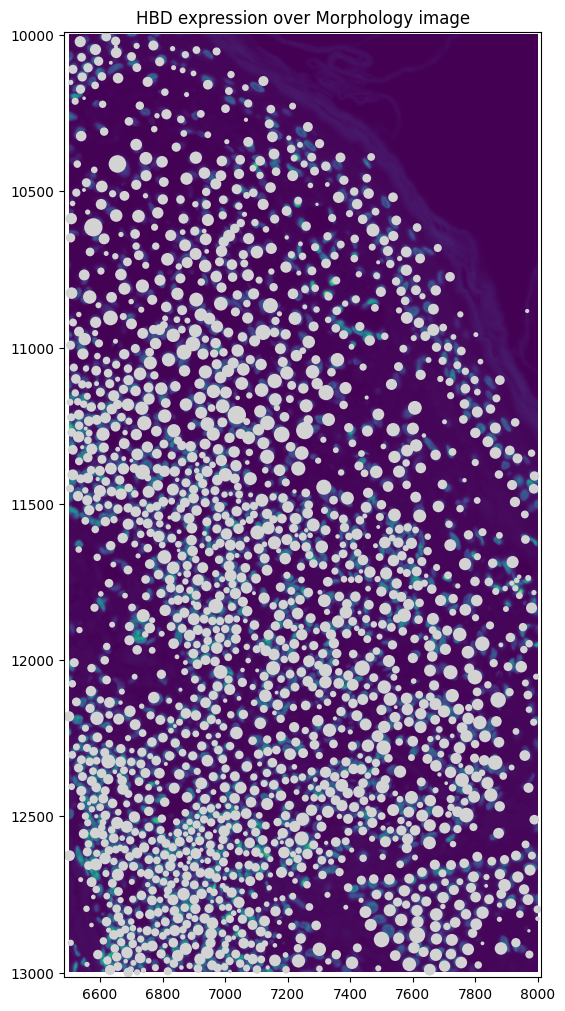

In [20]:
gene_name = "HBD"
crop0(sdata).pl.render_images("morphology_focus").pl.render_shapes(
    "cell_circles",
    color=gene_name,
).pl.show(title=f"{gene_name} expression over Morphology image", coordinate_systems="global", figsize=(20, 10))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.072649576..1.0].


IndexError: index 1960 is out of bounds for axis 0 with size 1960

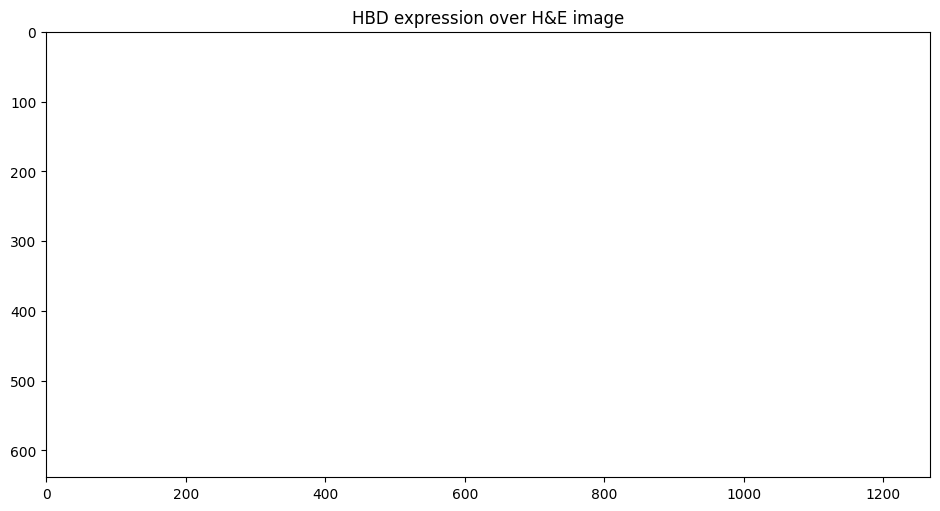

In [21]:
sdata.tables["table"].obs["region"] = "cell_boundaries"
sdata.set_table_annotates_spatialelement("table", region="cell_boundaries")

crop0(sdata).pl.render_images("HE").pl.render_shapes(
    "cell_boundaries",
    color=gene_name,
).pl.show(title=f"{gene_name} expression over H&E image", coordinate_systems="global", figsize=(10, 5))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.072649576..1.0].


IndexError: index 1960 is out of bounds for axis 0 with size 1960

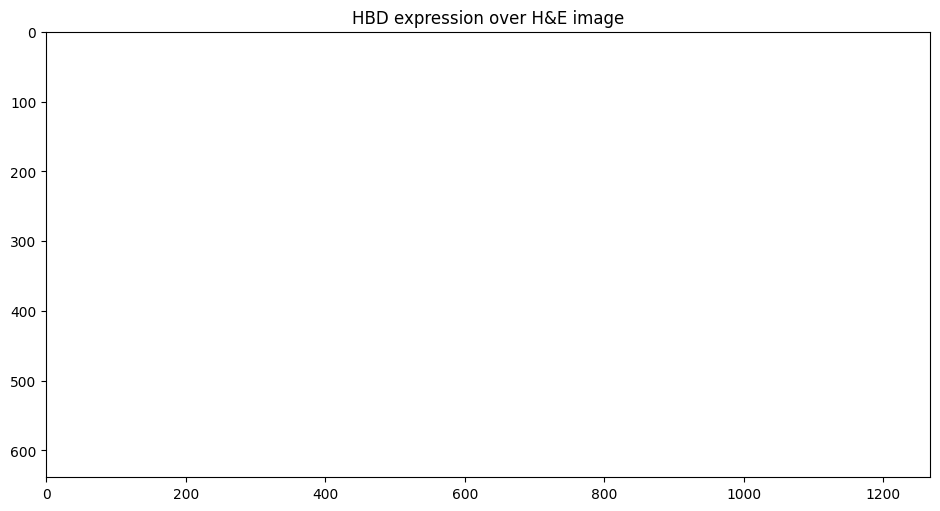

In [22]:
crop0(sdata).pl.render_images("HE").pl.render_shapes(
    "cell_boundaries",
    color=gene_name,
).pl.render_points(
    "transcripts",
    color="feature_name",
    groups=gene_name,
    palette="orange",
).pl.show(title=f"{gene_name} expression over H&E image", coordinate_systems="global", figsize=(10, 5))